# Main Dashboard of  experiments in post silicon for WL affinity (SPR)

In [1]:
%matplotlib inline

import os
from pca.analytics import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

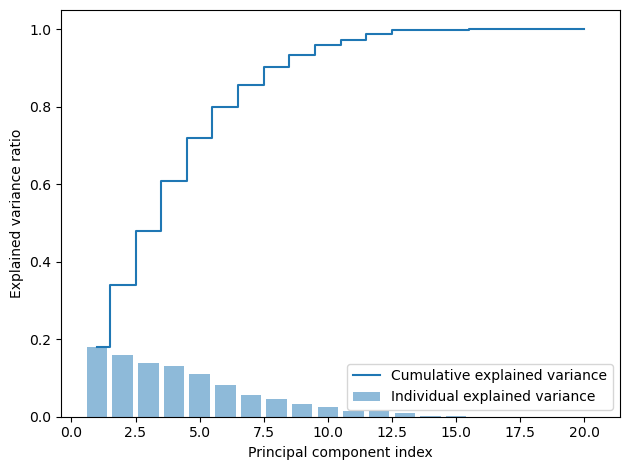

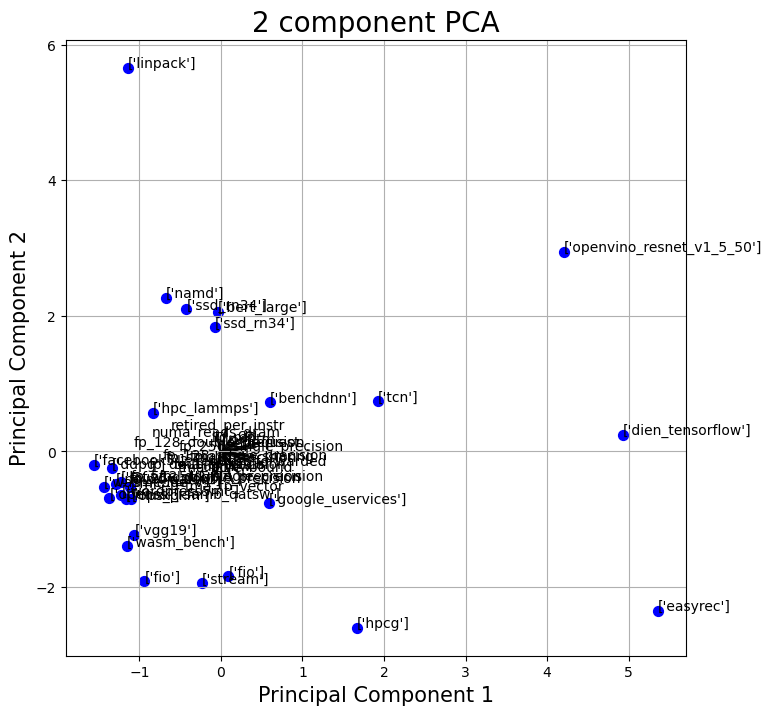

In [2]:
%matplotlib inline

filename = 'tests/wl-affinity/results_icx_norm.csv'
pca_df = None

if os.path.exists(filename):
    df = pd.read_csv(filename)

    features = list(df.columns)[1:]
    test_column = list(df.columns)[0]
    
    pca_df = get_PCA(df, features, test_column)
else:
    print("Filename error")

# Plot characteristics of the worklaods

<AxesSubplot:ylabel='test_name'>

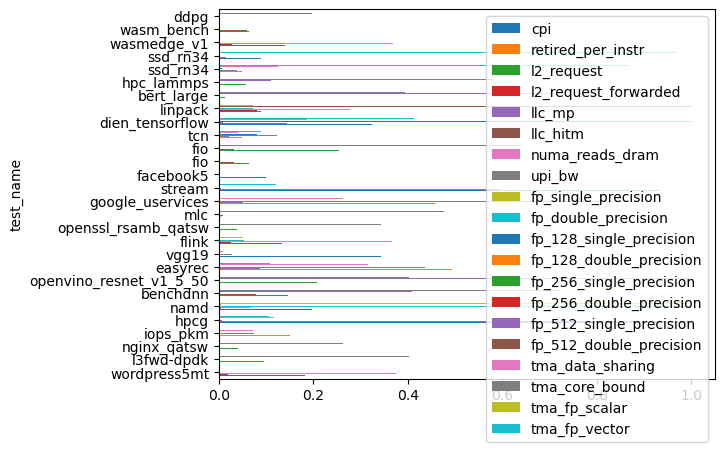

In [3]:
df.plot.barh(x="test_name")

In [4]:
print(f'Optimal number of clusters = {clusters}')

Optimal number of clusters = 2


## Clasification based on optimal number of clusters

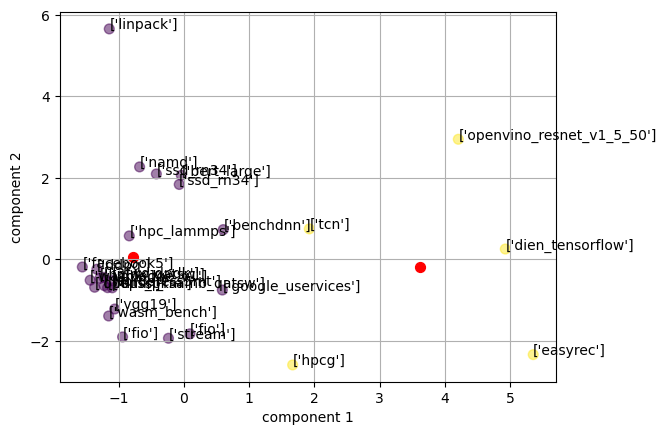

   PRED                test_name
0     0             wordpress5mt
0     0               l3fwd-dpdk
0     0              nginx_qatsw
0     0                 iops_pkm
0     0                     namd
0     0                 benchdnn
0     0                    vgg19
0     0                    flink
0     0      openssl_rsamb_qatsw
0     0                      mlc
0     0         google_uservices
0     0                   stream
0     0                facebook5
0     0                      fio
0     0                      fio
0     0                  linpack
0     0               bert_large
0     0               hpc_lammps
0     0                 ssd_rn34
0     0                 ssd_rn34
0     0              wasmedge_v1
0     0               wasm_bench
0     0                     ddpg
1     1                     hpcg
1     1  openvino_resnet_v1_5_50
1     1                  easyrec
1     1                      tcn
1     1          dien_tensorflow


In [5]:
df_result,kmeans = kmean_cluster("pca.csv",clusters)
print(df_result)

# Get the test cases closer to centroid

In [6]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
df = pca_df.iloc[closest]
df

,Unnamed: 0,principal component 1,principal component 2,test_name
22,22,-0.836232,0.572073,hpc_lammps
19,19,4.926816,0.249335,dien_tensorflow


<AxesSubplot:ylabel='test_name'>

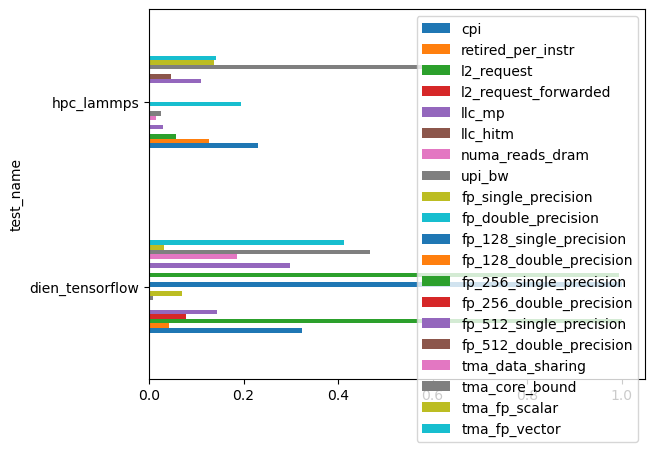

In [7]:
list_tests = df['test_name'].tolist()
df_global = pd.read_csv(filename)
df2 = df_global[df_global['test_name'].isin(list_tests)]
df2.plot.barh(x="test_name")